In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%%time
facebook_data = pd.read_excel('./huawei-social-network-data/Facebook_Data.xlsx')
ins_data = pd.read_excel('./huawei-social-network-data/Instagram_Data.xlsx')
twitter_data = pd.read_excel('./huawei-social-network-data/Twitter_Data.xlsx')

CPU times: user 24 s, sys: 92.3 ms, total: 24.1 s
Wall time: 24.2 s


In [29]:
fb_matrix = facebook_data.values[:,1:]
tw_matrix = twitter_data.values[:,1:]
ins_matrix = ins_data.values[:,1:]

In [30]:
fb_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=object)

(-0.5, 999.5, 999.5, -0.5)

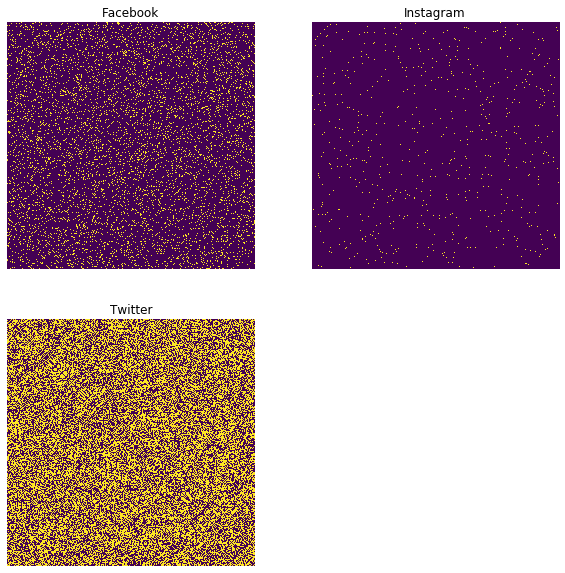

In [44]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.imshow(fb_matrix.astype(float))
ax1.set_title('Facebook')
ax1.axis('off')
ax2 = plt.subplot(2,2,2)
ax2.imshow(ins_matrix.astype(float))
ax2.set_title('Instagram')
ax2.axis('off')
ax3 = plt.subplot(2,2,3)
ax3.imshow(tw_matrix.astype(float))
ax3.set_title('Twitter')
ax3.axis('off')

In [56]:
from collections import Counter
def counter(dic, node):
    l = [0] * len(node)
    j = 0
    for i in node:
        l[j] = dic[i]
        j += 1
    dist = Counter(l)
    x = list(dist.keys())
    x.sort()
    y = [dist[i] for i in x]
    return x, y

## 1. Facebook

In [71]:
name_list = facebook_data['Unnamed: 0'].values
names = []
for name in name_list:
    if name[-1:] == '\xa0':
        name = name[:-2]
        name.strip()
    names.append(name)
name_list = np.array(names)

In [72]:
%%time
# add nodes first
D1 = nx.DiGraph()
for name in name_list:
    D1.add_node(name)
    
#add edges
for i in range(len(facebook_data)):
    row = facebook_data.iloc[i][1:]
    a0 = facebook_data.iloc[i][0]
    if a0[-1:] == '\xa0':
        a0 = a0[:-2]
        a0.strip()
    for j in range(len(row)):
        if row[j] == 1:
            a1 = name_list[j]
            D1.add_edge(a0,a1)

CPU times: user 9.04 s, sys: 9.65 ms, total: 9.05 s
Wall time: 9.06 s


In [73]:
# number of nodes
node = D1.order()
# number of edges
edge = D1.size()

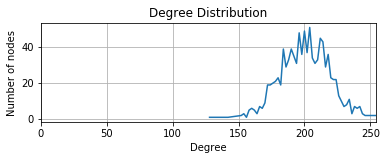

/Users/ruoqi/anaconda3/envs/graphs/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


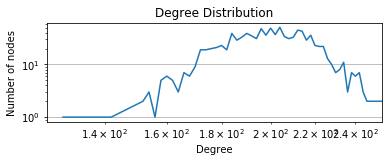

In [74]:
D1_un = D1.to_undirected()
deg, values = counter(D1.degree(), D1.node())
plt.subplot(2,1,1)
plt.grid(True)
plt.plot(deg, values)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution')
plt.xlim([0, max(deg)])
plt.show()
plt.subplot(2,1,2)
plt.grid(True)
plt.loglog(deg, values)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution')
plt.xlim([0, max(deg)])
plt.show()

In [20]:
%%time
#average shortest path length of Largest connected component
aspl=nx.average_shortest_path_length(D1)
print("Average Shortest path length=",aspl)

Average Shortest path length= 1.8996316316316317
CPU times: user 29.3 s, sys: 1.95 ms, total: 29.3 s
Wall time: 30 s


In [21]:
%%time
diameter=nx.diameter(D1)
print("Network diameter=",diameter)

Network diameter= 3
CPU times: user 28.7 s, sys: 9.92 ms, total: 28.7 s
Wall time: 29.3 s


In [24]:
%%time
#clustering coefficient

cc=nx.clustering(D1)
cc_values = sorted(set(cc.values()))
print("Average Clusterng Coefficient=", np.mean(list(cc.values())))

Average Clusterng Coefficient= 0.100329588445239
CPU times: user 4.77 s, sys: 3 ms, total: 4.78 s
Wall time: 4.8 s


In [18]:
deg = D1.degree() 
deg_dict = dict()
for k in D1.nodes():
    D1.node[k]['degree'] = deg[k]
    deg_dict[k] = deg[k]
    
deg_values = sorted(set(deg_dict.values()))
print("Average degree=", np.mean(list(deg_dict.values())))

Average degree= 200.612


In [17]:
#degree centrality distribution and parsing into Gephi
dc=nx.degree_centrality(D1)
for k in D1.nodes():
    D1.node[k]['degcen'] = dc[k]
dc_values = sorted(set(dc.values()))
print("Average degree centrality=",np.mean(list(dc.values())))

Average degree centrality= 0.2008128128128128


In [16]:
%%time
#Betweenness centrality distribution and parsing into Gephi
bcen=nx.betweenness_centrality(D1)

for k in D1.nodes():
    D1.node[k]['betcen'] = bcen[k]
bcen_values = sorted(set(bcen.values()))
print("Average betweenness centrality=", np.mean(list(bcen.values())))

Average betweenness centrality= 0.0009014345006328968
CPU times: user 23.9 s, sys: 22.9 ms, total: 23.9 s
Wall time: 24.3 s


In [15]:
%%time
#Eigen Vector centrality distribution
ecen=nx.eigenvector_centrality(D1)
for k in D1.nodes():
    D1.node[k]['eigcen'] = ecen[k]

ecen_values = sorted(set(ecen.values()))
print("Average Eigen vector centrality=", np.mean(list(ecen.values())))

Average Eigen vector centrality= 0.03148451847914608
CPU times: user 189 ms, sys: 5.98 ms, total: 195 ms
Wall time: 201 ms


In [14]:
#create .gml object with attributes for 'Gephi' visualization
nx.write_gml(D1, "./facebook.gml")

## 2. Twitter

In [64]:
name_list = twitter_data['Unnamed: 0'].values
names = []
for name in name_list:
    if name[-1:] == '\xa0':
        name = name[:-2]
        name.strip()
    names.append(name)
name_list = np.array(names)

In [65]:
%%time
# add nodes first
D2 = nx.DiGraph()
for name in name_list:
    D2.add_node(name)
    
#add edges
for i in range(len(twitter_data)):
    row = twitter_data.iloc[i][1:]
    a0 = twitter_data.iloc[i][0]
    if a0[-1:] == '\xa0':
        a0 = a0[:-2]
        a0.strip()
    for j in range(len(row)):
        if row[j] == 1:
            a1 = name_list[j]
            D2.add_edge(a0,a1)

CPU times: user 10.5 s, sys: 83.9 ms, total: 10.6 s
Wall time: 10.6 s


In [27]:
# number of nodes
node = D2.order()
# number of edges
edge = D2.size()

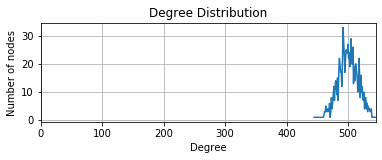

/Users/ruoqi/anaconda3/envs/graphs/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


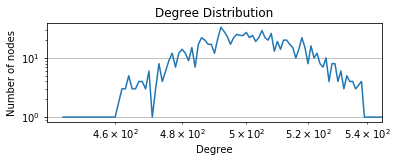

In [69]:
D2_un = D2.to_undirected()
deg, values = counter(D2_un.degree(), D2_un.node())
plt.subplot(2,1,1)
plt.grid(True)
plt.plot(deg, values)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution')
plt.xlim([0, max(deg)])
plt.show()
plt.subplot(2,1,2)
plt.grid(True)
plt.loglog(deg, values)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree Distribution')
plt.xlim([0, max(deg)])
plt.show()

In [28]:
%%time
#average shortest path length of Largest connected component
aspl=nx.average_shortest_path_length(D2)
print("Average Shortest path length=",aspl)

Average Shortest path length= 1.498868868868869
CPU times: user 2min 28s, sys: 55 ms, total: 2min 28s
Wall time: 2min 30s


In [29]:
%%time
diameter=nx.diameter(D2)
print("Network diameter=",diameter)

Network diameter= 2
CPU times: user 2min 25s, sys: 56 ms, total: 2min 25s
Wall time: 2min 27s


In [30]:
%%time
#clustering coefficient

cc=nx.clustering(D2)
cc_values = sorted(set(cc.values()))
print("Average Clusterng Coefficient=", np.mean(list(cc.values())))

Average Clusterng Coefficient= 0.5012099571405301
CPU times: user 3min 22s, sys: 71 ms, total: 3min 23s
Wall time: 3min 25s


In [31]:
deg = D2.degree() 
deg_dict = dict()
for k in D2.nodes():
    D2.node[k]['degree'] = deg[k]
    deg_dict[k] = deg[k]
    
deg_values = sorted(set(deg_dict.values()))
print("Average degree=", np.mean(list(deg_dict.values())))

Average degree= 1001.26


In [32]:
#degree centrality distribution and parsing into Gephi
dc=nx.degree_centrality(D2)
for k in D2.nodes():
    D2.node[k]['degcen'] = dc[k]
dc_values = sorted(set(dc.values()))
print("Average degree centrality=",np.mean(list(dc.values())))

Average degree centrality= 1.0022622622622623


In [33]:
%%time
#Betweenness centrality distribution and parsing into Gephi
bcen=nx.betweenness_centrality(D2)

for k in D2.nodes():
    D2.node[k]['betcen'] = bcen[k]
bcen_values = sorted(set(bcen.values()))
print("Average betweenness centrality=", np.mean(list(bcen.values())))

Average betweenness centrality= 0.0004998686060810304
CPU times: user 2min 39s, sys: 341 ms, total: 2min 39s
Wall time: 2min 42s


In [34]:
%%time
#Eigen Vector centrality distribution
ecen=nx.eigenvector_centrality(D2)
for k in D2.nodes():
    D2.node[k]['eigcen'] = ecen[k]

ecen_values = sorted(set(ecen.values()))
print("Average Eigen vector centrality=", np.mean(list(ecen.values())))

Average Eigen vector centrality= 0.03160581284590891
CPU times: user 450 ms, sys: 4.01 ms, total: 454 ms
Wall time: 473 ms


In [35]:
#create .gml object with attributes for 'Gephi' visualization
nx.write_gml(D2, "./twitter.gml")

## 3. Instagram

In [36]:
name_list = ins_data['Unnamed: 0'].values
names = []
for name in name_list:
    if name[-1:] == '\xa0':
        name = name[:-2]
        name.strip()
    names.append(name)
name_list = np.array(names)

In [37]:
%%time
# add nodes first
D3 = nx.DiGraph()
for name in name_list:
    D3.add_node(name)
    
#add edges
for i in range(len(ins_data)):
    row = ins_data.iloc[i][1:]
    a0 = ins_data.iloc[i][0]
    if a0[-1:] == '\xa0':
        a0 = a0[:-2]
        a0.strip()
    for j in range(len(row)):
        if row[j] == 1:
            a1 = name_list[j]
            D3.add_edge(a0,a1)

CPU times: user 10.9 s, sys: 11 ms, total: 10.9 s
Wall time: 11.3 s


In [38]:
# number of nodes
node = D3.order()
# number of edges
edge = D3.size()

In [39]:
%%time
#average shortest path length of Largest connected component
aspl=nx.average_shortest_path_length(D3)
print("Average Shortest path length=",aspl)

Average Shortest path length= 3.273137137137137
CPU times: user 4.67 s, sys: 1 µs, total: 4.67 s
Wall time: 4.71 s


In [40]:
%%time
diameter=nx.diameter(D3)
print("Network diameter=",diameter)

Network diameter= 5
CPU times: user 4.6 s, sys: 5.99 ms, total: 4.6 s
Wall time: 4.65 s


In [41]:
%%time
#clustering coefficient

cc=nx.clustering(D3)
cc_values = sorted(set(cc.values()))
print("Average Clusterng Coefficient=", np.mean(list(cc.values())))

Average Clusterng Coefficient= 0.009066096931963806
CPU times: user 72.1 ms, sys: 2 ms, total: 74.1 ms
Wall time: 71.9 ms


In [42]:
deg = D3.degree() 
deg_dict = dict()
for k in D3.nodes():
    D3.node[k]['degree'] = deg[k]
    deg_dict[k] = deg[k]
    
deg_values = sorted(set(deg_dict.values()))
print("Average degree=", np.mean(list(deg_dict.values())))

Average degree= 19.732


In [43]:
#degree centrality distribution and parsing into Gephi
dc=nx.degree_centrality(D3)
for k in D3.nodes():
    D3.node[k]['degcen'] = dc[k]
dc_values = sorted(set(dc.values()))
print("Average degree centrality=",np.mean(list(dc.values())))

Average degree centrality= 0.019751751751751756


In [44]:
%%time
#Betweenness centrality distribution and parsing into Gephi
bcen=nx.betweenness_centrality(D3)

for k in D3.nodes():
    D3.node[k]['betcen'] = bcen[k]
bcen_values = sorted(set(bcen.values()))
print("Average betweenness centrality=", np.mean(list(bcen.values())))

Average betweenness centrality= 0.0022776925221815
CPU times: user 6.12 s, sys: 8.99 ms, total: 6.13 s
Wall time: 6.35 s


In [45]:
%%time
#Eigen Vector centrality distribution
ecen=nx.eigenvector_centrality(D3)
for k in D3.nodes():
    D3.node[k]['eigcen'] = ecen[k]

ecen_values = sorted(set(ecen.values()))
print("Average Eigen vector centrality=", np.mean(list(ecen.values())))

Average Eigen vector centrality= 0.02969391454179673
CPU times: user 58.3 ms, sys: 2 ms, total: 60.3 ms
Wall time: 65.5 ms


In [46]:
#create .gml object with attributes for 'Gephi' visualization
nx.write_gml(D3, "./instagram.gml")